In [ ]:
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install torch
!pip install torchvision
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO

"""
# 아래 코드는 원래 원서의 코드
#url = "https://raw.githubusercontent.com/bpbpublications/Building-Transformer-Models-with-PyTorch/main/chapter7/tulip_field.png"
#response = requests.get(url)
#img = Image.open(BytesIO(response.content))
"""

# 예제 이미지 불러오기
# 번역서가 제공하는 Ch7 폴더의 tulip_field.png를 여러분의 구글 드라이브에 업로드하여 그 경로를 사용
img_path = '/content/drive/MyDrive/Book6/Ch7/tulip_field.png'

# 이미지 열기
img = Image.open(img_path)

# RGB로 변환
img = img.convert("RGB")


In [ ]:
# 런타임 17초 소요
from IPython.display import display

display(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 데이터 증강 파이프라인 정의
transforms = T.Compose([
    T.RandomRotation(degrees=(-15, 15), fill=0),
    T.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 이미지에 데이터 증강파이프라인을 적용
augmented_img = transforms(img)

# 이미지를 시각화하기 위해 해당 이미지를 PIL 이미지로 변환
# 다만, 이 변환 이전에 정규화(normalization) 취소 조치 실행
unnormalized_img = T.Compose([
    T.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225]),
    T.ToPILImage(),
])(augmented_img)



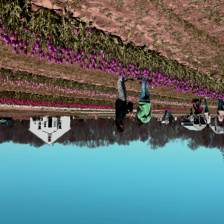

In [ ]:
### 역자 주: T.Compose에 포함돼 있는 Random 기능(예, RandomRotation)으로 인해
###        아래 그림이 책의 결과와 약간씩 다를 수 있습니다.
from IPython.display import display

display(unnormalized_img)